In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
res_train =  pd.read_csv('/content/train.csv')
res_test = pd.read_csv('/content/test.csv')

In [ ]:
res_train.shape

(137, 43)

In [ ]:
res_test.shape

(100000, 42)

In [ ]:
res_train.head(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,10,10,8,8,8,10,8,6.0,0,0,0,0,0,5,6,3,1,5,0,0,0.0,0.0,7.5,5.0,0,0,0,0,0,0,0,0,5017319.0
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5,5.0,3,4,4,3,4,2,4,1,2,1,5,4,4.0,5.0,1.0,3.0,4,5,2,2,3,5,4,4,5166635.0
7,7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,3,5,4,4,4,4,3,4.0,0,0,0,0,0,3,5,2,4,2,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,4491607.0
8,8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,2,1,5,5,5,1,5,5.0,1,1,2,1,4,1,1,1,1,1,4,4,4.0,2.0,2.0,3.0,4,5,5,3,4,5,4,5,4952497.0
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,4,10,10,10,10,2,10,7.5,0,0,0,0,0,25,3,3,1,10,0,0,0.0,0.0,5.0,2.5,0,0,0,0,0,0,0,0,5444227.0


In [ ]:
res_train.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

In [ ]:
res_train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,12.500000,12.500000,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [ ]:
# find the missing values
res_train.isna().any()
# no missing values 

Id            False
Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
revenue       False
dtype: bool

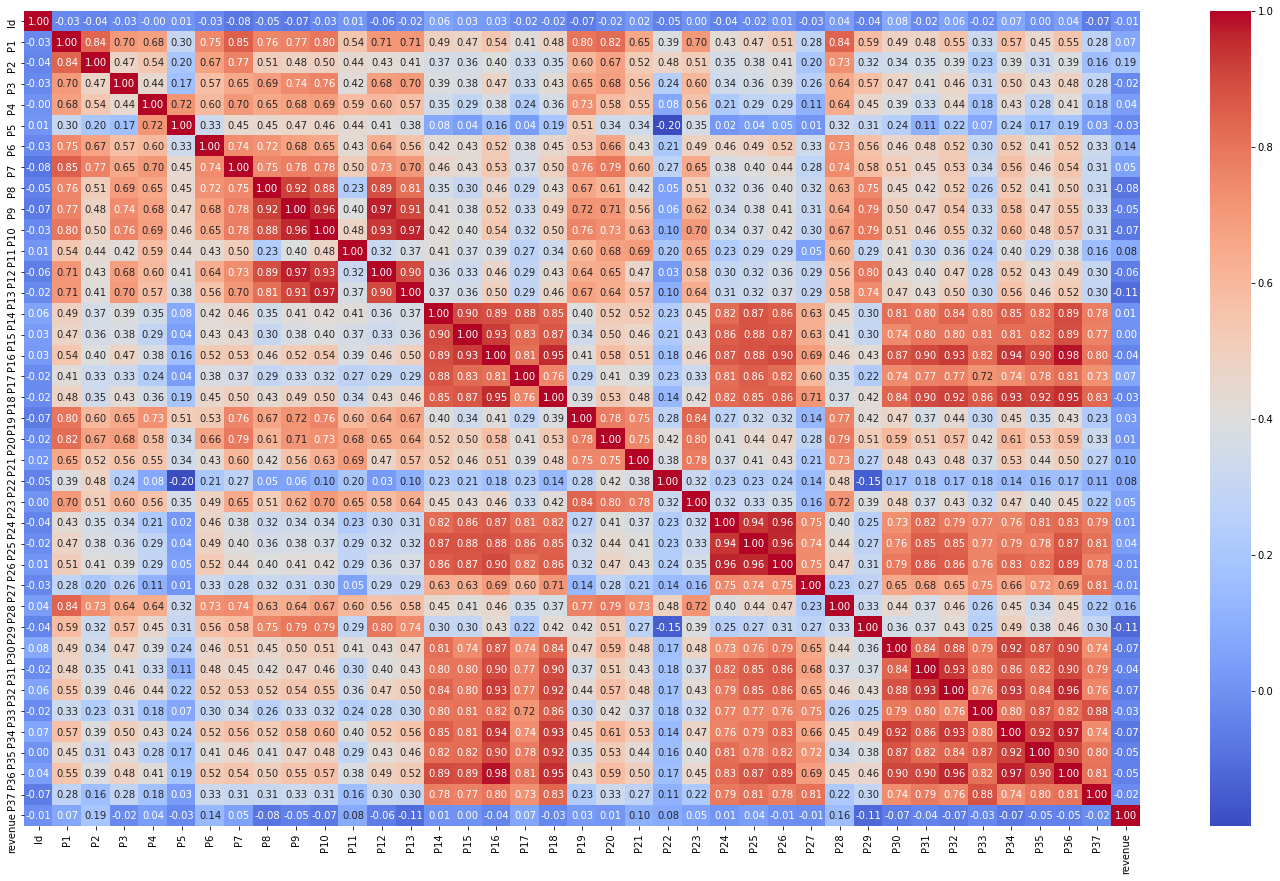

In [ ]:
# to find the correlation we can use heat map 
f,ax = plt.subplots(figsize=(25,15))
sns.heatmap(res_train.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Text(0.5, 1.0, 'Distribution of the revenue variable')

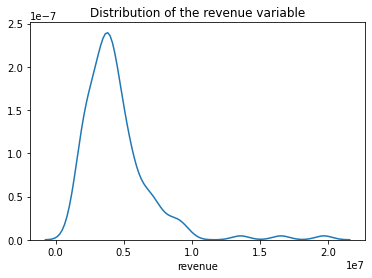

In [ ]:
sns.distplot(res_train['revenue'],hist=False)
plt.title('Distribution of the revenue variable')

In [ ]:
# finding the mean 
res_train['revenue'].mean()

4453532.613138686

In [ ]:
res_train['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

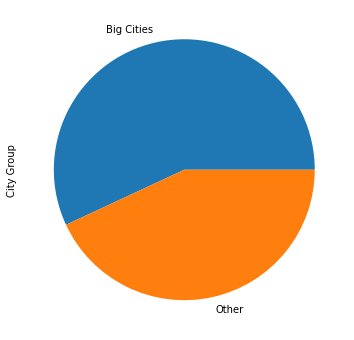

In [ ]:
res_train['City Group'].value_counts().plot(kind='pie',figsize=(6,6))

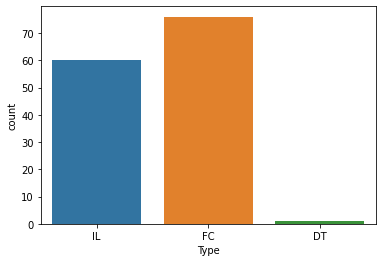

In [ ]:
# total count of that types .
sns.countplot(x="Type", data=res_train)

In [ ]:
# normalize and ploting 
min = res_train['revenue'].min()
max = res_train['revenue'].max()
mean = res_train['revenue'].mean()
normalize = (mean - min) / (max-min)
normalize

0.1781231639963536

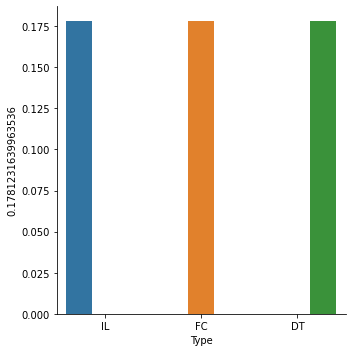

In [ ]:
sns.catplot(x='Type',y=normalize,hue='Type',kind='bar',data=res_train)

In [ ]:
res_train.drop('Id',axis=1,inplace=True)


In [ ]:
rest = pd.concat([res_train,res_test],axis=0)

In [ ]:
rest.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Id
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,NaN
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,NaN
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,NaN
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,NaN
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,NaN


In [ ]:
rest.shape

(100137, 43)

In [ ]:
rest['Open Date'] = pd.to_datetime(rest['Open Date'])
rest['launch_Month'] = [x.month for x in rest['Open Date']]
rest['launch_year'] = [x.year for x in rest['Open Date']]
rest.drop(['Id','Open Date'],axis=1,inplace=True)

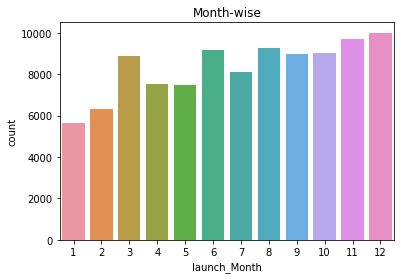

In [ ]:
sns.countplot(rest['launch_Month'])
plt.title('Month-wise');

In [ ]:
rest['Type'].value_counts()

FC    57095
IL    40507
DT     2245
MB      290
Name: Type, dtype: int64

In [ ]:
rest['City'].value_counts()

İstanbul    34137
Ankara       8739
İzmir        6474
Antalya      5915
Kocaeli      4365
            ...  
Elazığ          1
Osmaniye        1
Amasya          1
Karabük         1
Tokat           1
Name: City, Length: 63, dtype: int64

In [ ]:
# dropping unwanted columns 
rest.drop('City',axis=1,inplace=True)

In [ ]:
# encoding the data 
cols = ['City Group','Type']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in cols:
  if col in rest.columns:
     i = rest.columns.get_loc(col)
     rest.iloc[:,i] =le.fit_transform(rest.iloc[:,i].astype(str))

In [ ]:
rest.head(10)

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,launch_Month,launch_year
0,0,2,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,0,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,1,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,1,2,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,1,2,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
5,0,1,6,6.0,4.5,7.5,8,10,10,8,8,8,10,8,6.0,0,0,0,0,0,5,6,3,1,5,0,0,0.0,0.0,7.5,5.0,0,0,0,0,0,0,0,0,5017319.0,2,2010
6,0,2,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5,5.0,3,4,4,3,4,2,4,1,2,1,5,4,4.0,5.0,1.0,3.0,4,5,2,2,3,5,4,4,5166635.0,10,2010
7,0,2,4,5.0,4.0,5.0,2,3,5,4,4,4,4,3,4.0,0,0,0,0,0,3,5,2,4,2,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,4491607.0,6,2011
8,1,2,1,1.0,4.0,4.0,1,2,1,5,5,5,1,5,5.0,1,1,2,1,4,1,1,1,1,1,4,4,4.0,2.0,2.0,3.0,4,5,5,3,4,5,4,5,4952497.0,8,2010
9,1,2,6,4.5,6.0,7.5,6,4,10,10,10,10,2,10,7.5,0,0,0,0,0,25,3,3,1,10,0,0,0.0,0.0,5.0,2.5,0,0,0,0,0,0,0,0,5444227.0,11,2011


In [ ]:
# finding the mean revenue of each year
rest.groupby('launch_year')['revenue'].mean()

launch_year
1995             NaN
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    7.329030e+06
2000    1.359602e+07
2001             NaN
2002    4.991022e+06
2003             NaN
2004    3.482435e+06
2005    6.611118e+06
2006    4.203972e+06
2007    5.079333e+06
2008    4.876962e+06
2009    4.652457e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.837859e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

In [ ]:
# since the mean revenue of few years is low it is nan so we can use dummy variables to overcome 
rest['launch_year'].astype(object)
year_dummy = pd.get_dummies(rest[['launch_year','launch_Month']],drop_first=True)
rest = pd.concat([rest,year_dummy],axis=1)
rest.drop(['launch_year','launch_Month'],axis=1, inplace=True)


In [ ]:
# splitting into train and test as we have combined in preprocessing 
train_res = rest.dropna(axis=0)
test_res = rest[137:].drop('revenue',axis=1)

In [ ]:
train_res.shape

(137, 40)

In [ ]:
test_res.head(10)

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,1,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,2,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,0,1,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,1,2,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,1,1,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0
5,1,1,4,4.5,5.0,4.0,2,6,5,5,10,10,2,5,7.5,0,0,0,0,0,2,5,3,2,3,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
6,1,1,4,2.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,0,0,1,0,5,5,2,2,3,2,5,0.0,0.0,1.0,3.0,3,5,4,1,2,0,0,0
7,0,2,2,5.0,4.0,5.0,2,3,5,4,4,4,2,4,5.0,0,0,5,2,0,5,4,2,1,3,2,0,0.0,1.0,3.0,1.0,3,0,0,0,3,0,4,4
8,0,2,5,4.0,4.0,4.0,1,3,5,4,4,4,2,4,5.0,0,4,0,3,4,3,5,1,5,2,0,4,0.0,1.0,5.0,1.0,0,4,0,0,3,5,0,0
9,0,2,15,7.5,6.0,3.0,4,8,10,5,8,8,1,6,5.0,0,8,4,1,9,25,15,1,1,1,3,0,10.0,2.5,1.0,2.5,20,2,0,2,24,4,0,3


In [ ]:
# final look at train set
train_res.head(10)

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,2,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,0,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,1,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,1,2,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,1,2,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
5,0,1,6,6.0,4.5,7.5,8,10,10,8,8,8,10,8,6.0,0,0,0,0,0,5,6,3,1,5,0,0,0.0,0.0,7.5,5.0,0,0,0,0,0,0,0,0,5017319.0
6,0,2,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5,5.0,3,4,4,3,4,2,4,1,2,1,5,4,4.0,5.0,1.0,3.0,4,5,2,2,3,5,4,4,5166635.0
7,0,2,4,5.0,4.0,5.0,2,3,5,4,4,4,4,3,4.0,0,0,0,0,0,3,5,2,4,2,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,4491607.0
8,1,2,1,1.0,4.0,4.0,1,2,1,5,5,5,1,5,5.0,1,1,2,1,4,1,1,1,1,1,4,4,4.0,2.0,2.0,3.0,4,5,5,3,4,5,4,5,4952497.0
9,1,2,6,4.5,6.0,7.5,6,4,10,10,10,10,2,10,7.5,0,0,0,0,0,25,3,3,1,10,0,0,0.0,0.0,5.0,2.5,0,0,0,0,0,0,0,0,5444227.0


In [ ]:
from sklearn.model_selection import train_test_split
X=train_res.drop('revenue',axis=1)
y=train_res['revenue'][:137]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          r2_score(y_test,pred)
                         ]
results

[07:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,R2-score
Linear Regression,3.475278e+06,2.981434e+13,-2.535301
Logistic Regression,2.193536e+06,1.331414e+13,-0.578754
Decision Tree,2.165320e+06,1.256204e+13,-0.489572
Random Forest,1.823371e+06,9.562604e+12,-0.133907
Support Vector Machines,1.567519e+06,8.871503e+12,-0.051958
K-nearest Neighbors,1.761723e+06,8.728067e+12,-0.034950
XGBoost,1.816317e+06,1.067494e+13,-0.265805


In [ ]:
# fitting on xgboost and predicting on test 
xgb=XGBRegressor()
xgb.fit(X,y)
pred_test = xgb.predict(test_res)

[08:13:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
id = res_test['Id']
result = pd.DataFrame({ 'Id' : id, 'Prediction': pred_test })
result.head(10)

,Id,Prediction
0,0,3545736.250
1,1,2723120.000
2,2,3529007.250
3,3,4932134.500
4,4,5868155.500
5,5,3660797.000
6,6,3086583.500
7,7,6264337.500
8,8,4377913.500
9,9,1831889.875


In [ ]:
result.to_csv('res-xgb.csv', index = False)

In [ ]:
knn=KNeighborsRegressor()
knn.fit(X,y)
pred_test1 = knn.predict(test_res)

In [ ]:
id = res_test['Id']
result1 = pd.DataFrame({ 'Id' : id, 'Prediction': pred_test1 })
result1.to_csv('res-knn.csv', index = False)

In [ ]:
svr  = SVR()
svr.fit(X,y)
pred_test2 = svr.predict(test_res)

In [ ]:
id = res_test['Id']
result2 = pd.DataFrame({ 'Id' : id, 'Prediction': pred_test2})
result2.to_csv('res-svr.csv', index = False)

In [ ]:
##thank you............